In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [35]:
df=pd.read_csv("C:\Ragavi Job\Skillovilla\Projects\Medical Insurance Cost Prediction\insurance (1).csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<Axes: xlabel='smoker', ylabel='count'>

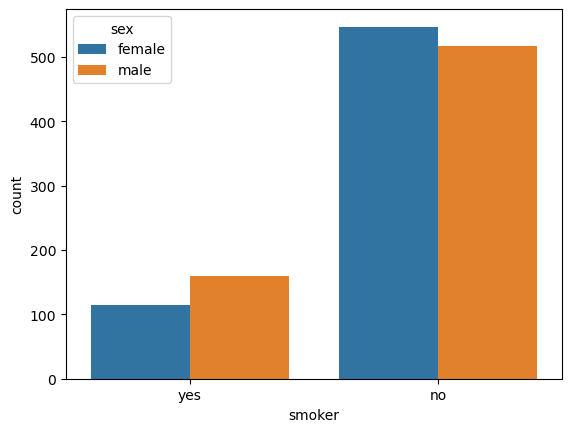

In [7]:
sns.countplot(x='smoker',hue='sex',data=df)

In [ ]:
male smokes higher compared to female

In [8]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

C:\Users\Ragavi\AppData\Local\Temp\ipykernel_20276\4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

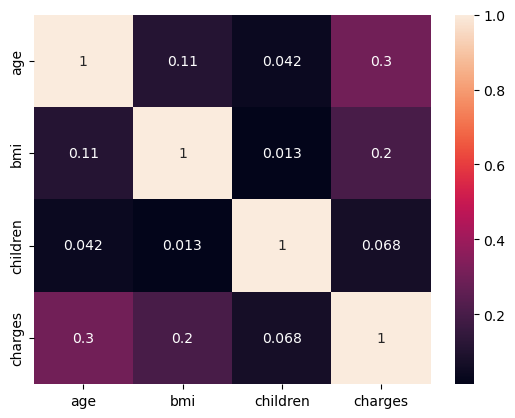

In [9]:
sns.heatmap(df.corr(),annot=True)

<Axes: xlabel='age', ylabel='charges'>

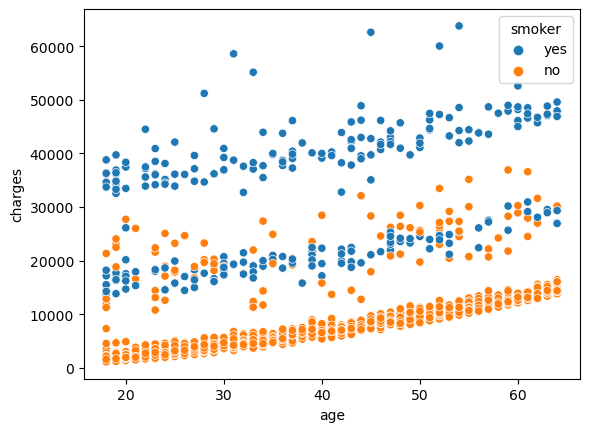

In [14]:
sns.scatterplot(x=df['age'],y=df['charges'],hue=df['smoker'])

In [ ]:
from the above graph the person having smoking habit has high charge

<Axes: xlabel='children', ylabel='charges'>

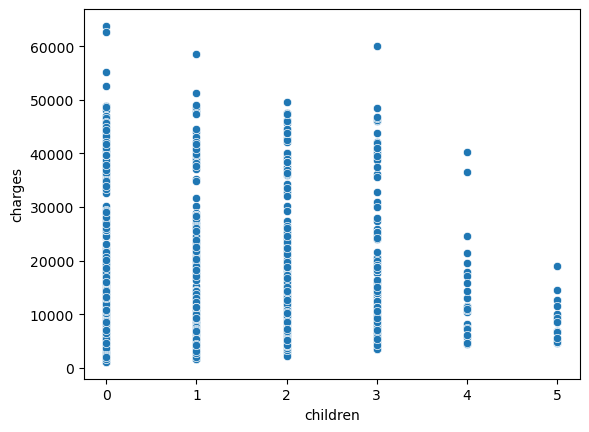

In [15]:
sns.scatterplot(x=df['children'],y=df['charges'])

<Axes: xlabel='region', ylabel='count'>

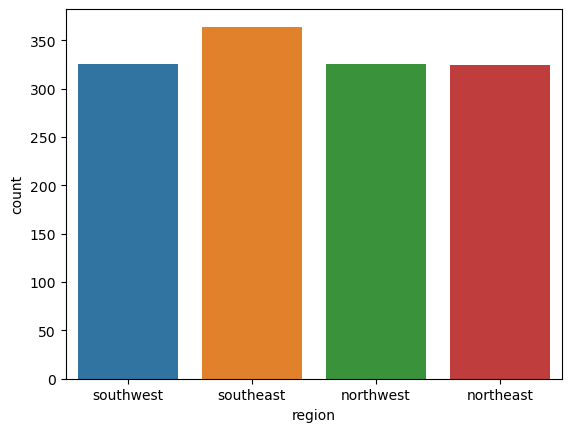

In [16]:
sns.countplot(x=df['region'])

<Axes: xlabel='region', ylabel='charges'>

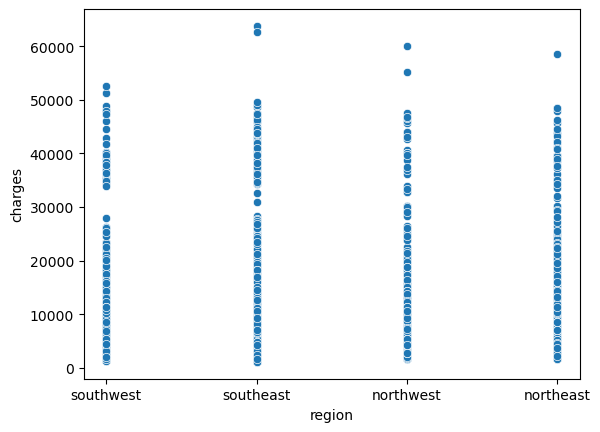

In [19]:
sns.scatterplot(x=df['region'],y=df['charges'])

C:\Users\Ragavi\AppData\Local\Temp\ipykernel_20276\1951037234.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'],hist=True)


<Axes: xlabel='age', ylabel='Density'>

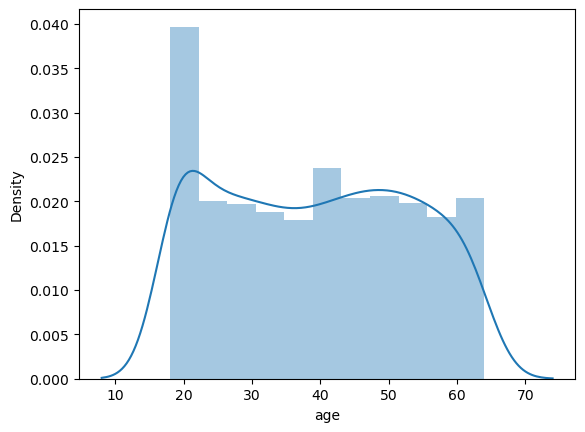

In [20]:
sns.distplot(df['age'],hist=True)

In [ ]:
more number of people are in age of 20-25

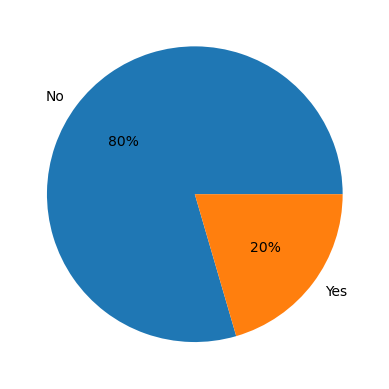

In [23]:
data=df.groupby('smoker').size()
plt.pie(data,labels=['No','Yes'],autopct='%.0f%%')
plt.show()

In [ ]:
80% are not smoker

C:\Users\Ragavi\AppData\Local\Temp\ipykernel_20276\4168411822.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bmi'])


<Axes: xlabel='bmi', ylabel='Density'>

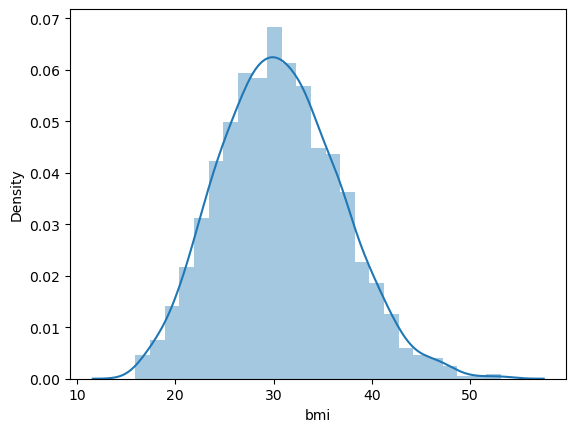

In [24]:
sns.distplot(df['bmi'])

In [ ]:
People above 20 are overweighted person
More no of people taking insurance are obese and iverweighted person

<Axes: xlabel='children', ylabel='count'>

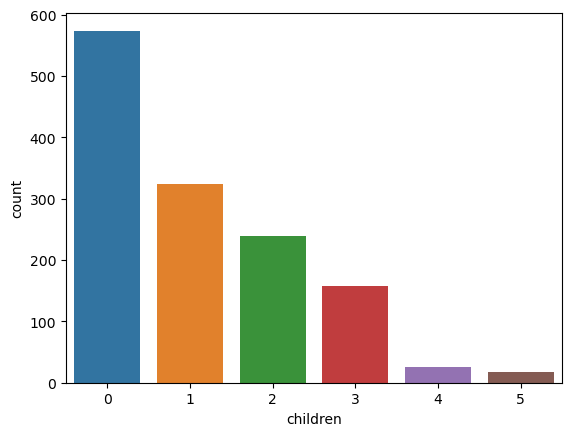

In [26]:
sns.countplot(x=df['children'])

In [ ]:
More no of families don't have children

In [34]:
df.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [37]:
lc=LabelEncoder()

In [41]:
df[['sex','smoker','region']]=df[['sex','smoker','region']].apply(lc.fit_transform)
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [43]:
X=df.drop(['charges'],axis=1)
y=df['charges']

In [54]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [55]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

# Linear Regression Model

In [56]:
lr=LinearRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)

In [52]:
from sklearn.metrics import r2_score,mean_squared_error

In [57]:
r2_score_lr=r2_score(y_pred,y_test)
r2_score_lr

0.7086166433516314

In [59]:
np.sqrt(mean_squared_error(y_pred,y_test))

5799.587091438359